In [59]:
import pandas as pd

plot_folder = "Student"
data = pd.read_csv("Student/Student.csv")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [60]:
X.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [61]:
y.describe()

count         4424
unique           3
top       Graduate
freq          2209
Name: Target, dtype: object

In [62]:
y = y.to_numpy().ravel()

In [63]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=1, stratify=y
)

In [64]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

num_features = X.shape[1]
num_outputs = len(set(y))
num_avg = (num_features + num_outputs) // 2

hidden_layers = [
    (),
    (num_avg,),
    (num_avg, num_avg),
    (num_avg, num_outputs),
    (num_features, num_avg, num_outputs),
]

models = []
y_train_preds, y_test_preds = [], []
acc_train, acc_test = [], []
prec_train, prec_test = [], []
rec_train, rec_test = [], []
f1_train, f1_test = [], []

for hidden_layer in hidden_layers:
    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer,
        max_iter=2000,
        random_state=1,
    )
    model.fit(X_train, y_train)
    models.append(model)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    y_train_preds.append(y_train_pred)
    y_test_preds.append(y_test_pred)
    
    acc_train.append(accuracy_score(y_train, y_train_pred))
    acc_test.append(accuracy_score(y_test, y_test_pred))
    prec_train.append(precision_score(y_train, y_train_pred, average="weighted"))
    prec_test.append(precision_score(y_test, y_test_pred, average="weighted"))
    rec_train.append(recall_score(y_train, y_train_pred, average="weighted"))
    rec_test.append(recall_score(y_test, y_test_pred, average="weighted"))
    f1_train.append(f1_score(y_train, y_train_pred, average="weighted"))
    f1_test.append(f1_score(y_test, y_test_pred, average="weighted"))

  Hidden Layers  Train Accuracy  Test Accuracy  Train Precision  \
0            ()        0.771687       0.763842         0.755333   
1         (19,)        0.792879       0.762712         0.779944   
2      (19, 19)        0.806725       0.763842         0.798426   
3       (19, 3)        0.788076       0.763842         0.773790   
4   (36, 19, 3)        0.854196       0.741243         0.853981   

   Test Precision  Train Recall  Test Recall  Train F1 Score  Test F1 Score  
0        0.750396      0.771687     0.763842        0.753985       0.745460  
1        0.745790      0.792879     0.762712        0.779644       0.746730  
2        0.751148      0.806725     0.763842        0.797852       0.752442  
3        0.749305      0.788076     0.763842        0.773497       0.749251  
4        0.739851      0.854196     0.741243        0.853296       0.739851  


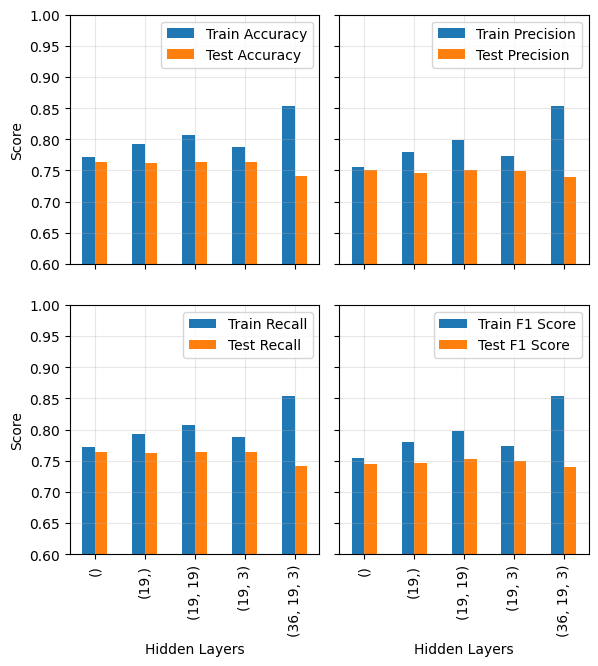

In [65]:
import pandas as pd

results = pd.DataFrame(
    data=list(
        zip(
            hidden_layers,
            acc_train,
            acc_test,
            prec_train,
            prec_test,
            rec_train,
            rec_test,
            f1_train,
            f1_test,
        )
    ),
    columns=[
        "Hidden Layers",
        "Train Accuracy",
        "Test Accuracy",
        "Train Precision",
        "Test Precision",
        "Train Recall",
        "Test Recall",
        "Train F1 Score",
        "Test F1 Score",
    ],
)
print(results)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 7))

for i, ax in enumerate(axes.flat):
    results.plot(
        0, [2 * i + 1, 2 * i + 2], ax=ax, kind="bar", ylim=(0.6, 1.0), ylabel="Score"
    )
    ax.grid(alpha=0.3)
    ax.axhline(1, color="black", linestyle="--", linewidth=0.5)
    ax.set_box_aspect(1)

plt.tight_layout()
plt.savefig(f"{plot_folder}/scores.png", dpi=300)

In [66]:
import shap

shap.initjs()

In [67]:
X100 = shap.utils.sample(X_train, 100)

In [68]:
explainer = shap.KernelExplainer(model.predict_proba, X100, feature_names=X.columns)
shap_values = explainer.shap_values(X_test)

  0%|          | 0/885 [00:00<?, ?it/s]

100%|██████████| 885/885 [04:38<00:00,  3.18it/s]


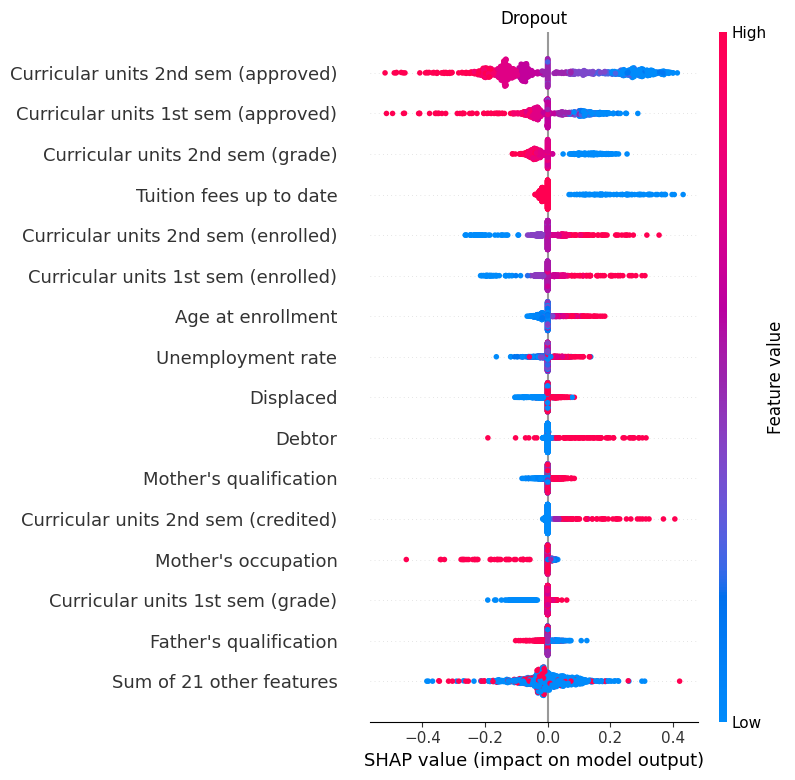

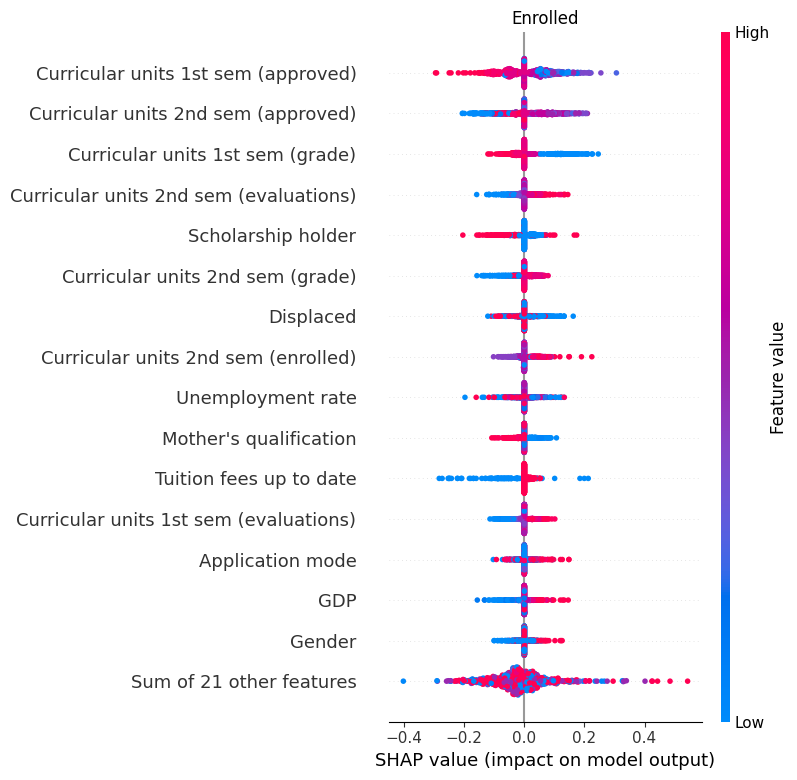

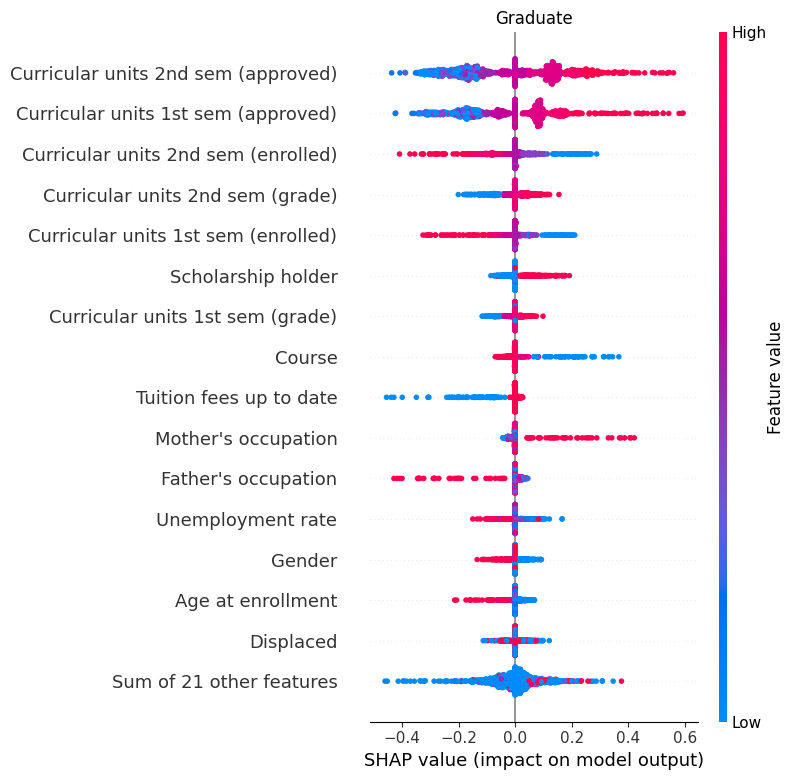

In [69]:
for i, class_name in enumerate(model.classes_):
    per_class_explanation = shap.Explanation(
        shap_values[:, :, i], data=X_test, feature_names=X.columns
    )
    shap.plots.beeswarm(per_class_explanation, show=False, max_display=16)
    plt.gca().set_title(f"{class_name}")
    plt.tight_layout()
    plt.savefig(f"{plot_folder}/per_class_beeswarm_class_{class_name}.png", dpi=300)
    plt.show()

In [70]:
import numpy as np

per_class_mean_abs_shap = {}

for i, class_name in enumerate(model.classes_):
    per_class_mean_abs_shap[class_name] = np.mean(np.abs(shap_values[:, :, i]), axis=0)

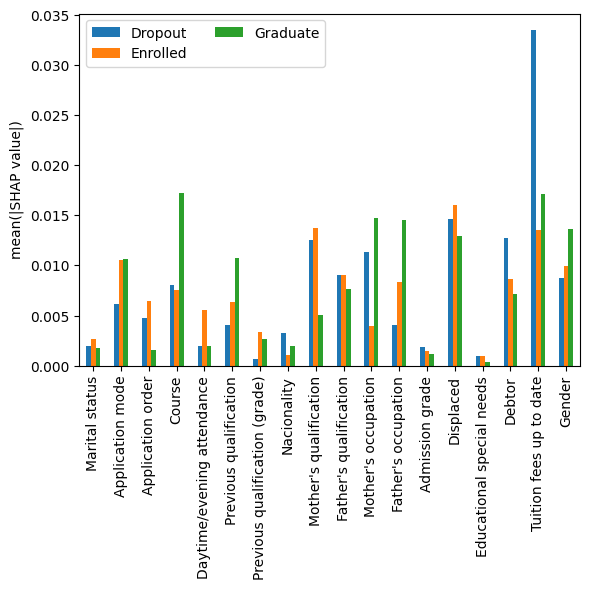

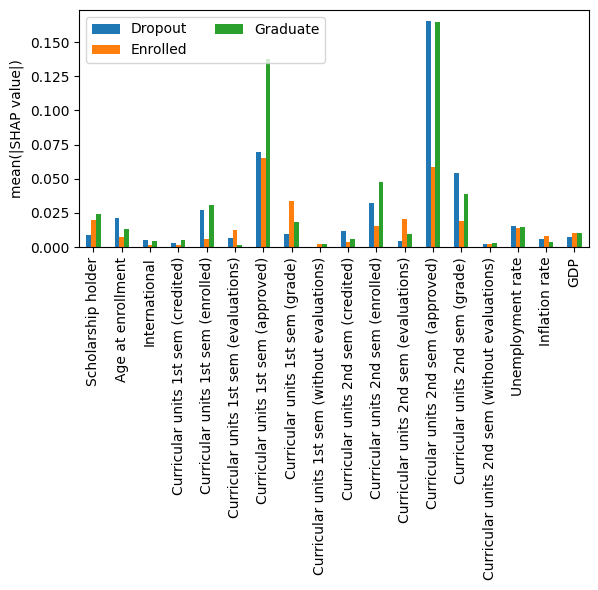

In [71]:
df = pd.DataFrame(per_class_mean_abs_shap)

fig, ax = plt.subplots(figsize=(6, 6))
df[:len(df)//2].plot.bar(ax=ax)

ax.set_xticklabels(X.columns[:len(df)//2])
ax.legend(ncols=2)
ax.set_ylabel(r"mean(|SHAP value|)")

plt.tight_layout()
fig.savefig(f"{plot_folder}/per_class_mean_abs_shap_part1.png", dpi=300)
plt.show()

fig, ax = plt.subplots(figsize=(6, 6))
df[len(df)//2:].plot.bar(ax=ax)

ax.set_xticklabels(X.columns[len(df)//2:])
ax.legend(ncols=2)
ax.set_ylabel(r"mean(|SHAP value|)")

plt.tight_layout()
fig.savefig(f"{plot_folder}/per_class_mean_abs_shap_part2.png", dpi=300)
plt.show()

In [72]:
preds = model.predict(X_test)

actual_prediction_shap_values = []

for i, pred in enumerate(preds):
    actual_prediction_shap_values.append(
        shap_values[i][:, model.classes_.tolist().index(pred)]
    )

actual_prediction_shap_values = np.array(actual_prediction_shap_values)

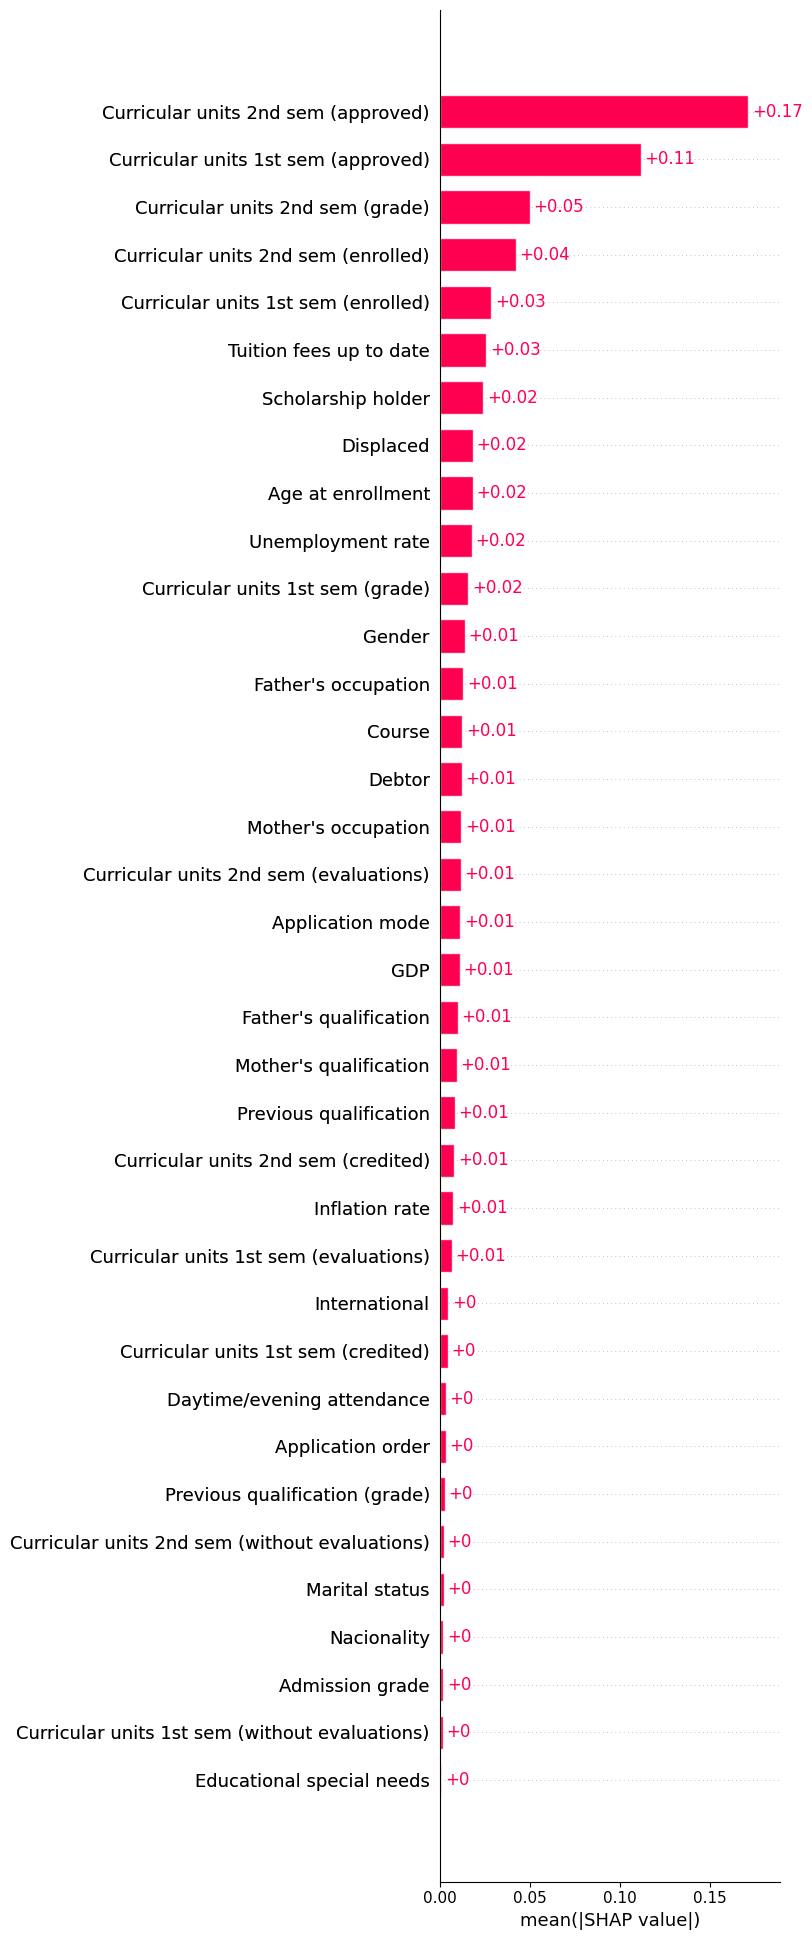

In [73]:
explanation = shap.Explanation(actual_prediction_shap_values, feature_names=X.columns)
shap.plots.bar(explanation, show=False, max_display=36)
plt.tight_layout()
plt.savefig(f"{plot_folder}/actual_prediction_mean_abs_shap_values.png", dpi=300)
plt.show()

In [74]:
cols_to_remove = [
    "International",
    'Curricular units 1st sem (credited)',
    "Daytime/evening attendance",
    "Application order",
    "Previous qualification (grade)",
    "Marital status",
    "Curricular units 2nd sem (without evaluations)",
    "Nacionality",
    "Admission grade",
    "Curricular units 1st sem (without evaluations)",
    "Educational special needs",
]
cols_idx_to_remove = np.flatnonzero(np.isin(X.columns, cols_to_remove))
print(cols_idx_to_remove)

mask = np.ones(num_features, dtype=bool)
mask[cols_idx_to_remove] = False

[ 0  2  4  6  7 12 14 20 21 26 32]


In [75]:
new_X_train = X_train[:, mask]
new_X_test = X_test[:, mask]

In [76]:
new_models = []
new_y_train_preds, new_y_test_preds = [], []
new_acc_train, new_acc_test = [], []
new_prec_train, new_prec_test = [], []
new_rec_train, new_rec_test = [], []
new_f1_train, new_f1_test = [], []

for hidden_layer in hidden_layers:
    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer,
        max_iter=2000,
        random_state=1,
    )
    model.fit(new_X_train, y_train)
    models.append(model)

    y_train_pred = model.predict(new_X_train)
    y_test_pred = model.predict(new_X_test)
    
    new_y_train_preds.append(y_train_pred)
    new_y_test_preds.append(y_test_pred)

    new_acc_train.append(accuracy_score(y_train, y_train_pred))
    new_acc_test.append(accuracy_score(y_test, y_test_pred))
    new_prec_train.append(precision_score(y_train, y_train_pred, average="weighted"))
    new_prec_test.append(precision_score(y_test, y_test_pred, average="weighted"))
    new_rec_train.append(recall_score(y_train, y_train_pred, average="weighted"))
    new_rec_test.append(recall_score(y_test, y_test_pred, average="weighted"))
    new_f1_train.append(f1_score(y_train, y_train_pred, average="weighted"))
    new_f1_test.append(f1_score(y_test, y_test_pred, average="weighted"))

  Hidden Layers  Train Accuracy  Test Accuracy  Train Precision  \
0            ()        0.765188       0.762712         0.747686   
1         (19,)        0.794292       0.767232         0.784657   
2      (19, 19)        0.807008       0.758192         0.799765   
3       (19, 3)        0.795705       0.774011         0.784271   
4   (36, 19, 3)        0.821136       0.748023         0.815748   

   Test Precision  Train Recall  Test Recall  Train F1 Score  Test F1 Score  
0        0.752509      0.765188     0.762712        0.746678       0.746074  
1        0.757747      0.794292     0.767232        0.783505       0.756593  
2        0.744411      0.807008     0.758192        0.795113       0.743826  
3        0.764187      0.795705     0.774011        0.784444       0.763261  
4        0.739212      0.821136     0.748023        0.813525       0.738938  


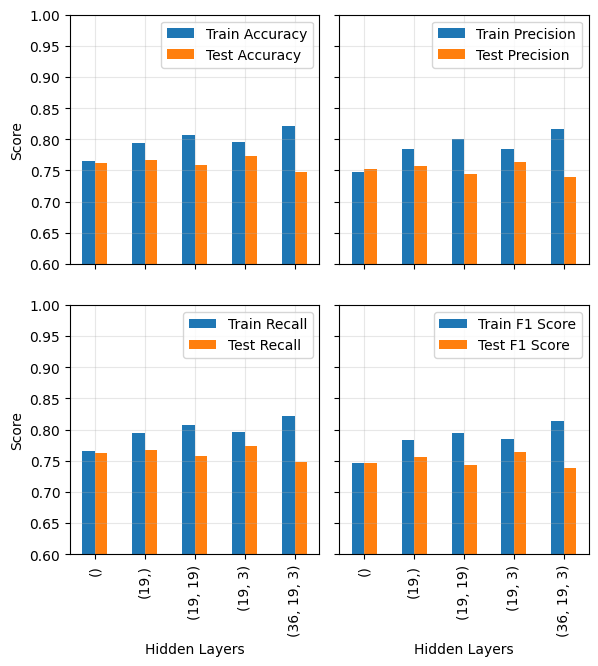

In [77]:
results = pd.DataFrame(
    data=list(
        zip(
            hidden_layers,
            new_acc_train,
            new_acc_test,
            new_prec_train,
            new_prec_test,
            new_rec_train,
            new_rec_test,
            new_f1_train,
            new_f1_test,
        )
    ),
    columns=[
        "Hidden Layers",
        "Train Accuracy",
        "Test Accuracy",
        "Train Precision",
        "Test Precision",
        "Train Recall",
        "Test Recall",
        "Train F1 Score",
        "Test F1 Score",
    ],
)
print(results)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 7))

for i, ax in enumerate(axes.flat):
    results.plot(
        0, [2 * i + 1, 2 * i + 2], ax=ax, kind="bar", ylim=(0.6, 1.0), ylabel="Score"
    )
    ax.axhline(1, color="black", linestyle="--", linewidth=0.5)
    ax.grid(alpha=0.3)
    ax.set_box_aspect(1)

plt.tight_layout()
plt.savefig(f"{plot_folder}/new_scores.png", dpi=300)

In [78]:
for i, hidden_layer in enumerate(hidden_layers):
    matches_train = sum(
        old == new for old, new in zip(new_y_train_preds[i], y_train_preds[i])
    )
    size_train = len(y_train_preds[i])
    matches_test = sum(
        old == new for old, new in zip(new_y_test_preds[i], y_test_preds[i])
    )
    size_test = len(y_test_preds[i])
    print(f"Hidden Layer {hidden_layer}:")
    print(f"\tTrain Matches: {matches_train}/{size_train} ({matches_train/size_train*100:.2f}%)")
    print(f"\tTest Matches: {matches_test}/{size_test} ({matches_test/size_test*100:.2f}%)")

Hidden Layer ():
	Train Matches: 3407/3539 (96.27%)
	Test Matches: 860/885 (97.18%)
Hidden Layer (19,):
	Train Matches: 3281/3539 (92.71%)
	Test Matches: 800/885 (90.40%)
Hidden Layer (19, 19):
	Train Matches: 3203/3539 (90.51%)
	Test Matches: 790/885 (89.27%)
Hidden Layer (19, 3):
	Train Matches: 3244/3539 (91.66%)
	Test Matches: 798/885 (90.17%)
Hidden Layer (36, 19, 3):
	Train Matches: 3110/3539 (87.88%)
	Test Matches: 757/885 (85.54%)
